# Hamoye Stage E
## BY Arvind Sandhu
## Hamoye Student ID : 146fd797f7c1f000

### Importing required libraries

In [40]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from fbprophet import Prophet
from statsmodels.tsa.stattools import adfuller

### Loading our dataset provided by Hamoye

In [3]:
fpath = "C:/Users/Arvind.sandhu/Desktop/hamoye/Time_series_analysis_and_forecast_DATASET.csv"
data = pd.read_csv(fpath)
data

,FullDate,Tmax,SysLoad,GasPrice,ElecPrice
0,2010-09-01 00:00:00,15.8,1688.21500,3.6900,23.710
1,2010-09-01 01:00:00,15.8,1669.19500,3.6900,22.635
2,2010-09-01 02:00:00,15.8,1491.98000,3.6900,22.565
3,2010-09-01 03:00:00,15.8,1330.76000,3.6900,18.910
4,2010-09-01 04:00:00,15.8,1247.94000,3.6900,18.030
...,...,...,...,...,...
92011,2021-02-28 19:00:00,24.3,449.63625,5.4848,117.925
92012,2021-02-28 20:00:00,24.3,815.59975,5.4848,87.880
92013,2021-02-28 21:00:00,24.3,745.12325,5.4848,62.060
92014,2021-02-28 22:00:00,24.3,694.95150,5.4848,62.000


In [4]:
data["FullDate"] = pd.to_datetime(data["FullDate"])

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 92016 entries, 0 to 92015
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   FullDate   92016 non-null  datetime64[ns]
 1   Tmax       92016 non-null  float64       
 2   SysLoad    92016 non-null  float64       
 3   GasPrice   92016 non-null  float64       
 4   ElecPrice  92016 non-null  float64       
dtypes: datetime64[ns](1), float64(4)
memory usage: 3.5 MB


In [6]:
data.isnull().sum()

FullDate     0
Tmax         0
SysLoad      0
GasPrice     0
ElecPrice    0
dtype: int64

In [7]:
data.set_index("FullDate", inplace=True)

In [8]:
elec_daily = data["ElecPrice"].resample("D").sum()
elec_daily

FullDate
2010-09-01    2751.700
2010-09-02     570.810
2010-09-03     504.975
2010-09-04     502.275
2010-09-05     500.555
                ...   
2021-02-24     634.770
2021-02-25     577.515
2021-02-26    1445.495
2021-02-27     488.980
2021-02-28     -98.985
Freq: D, Name: ElecPrice, Length: 3834, dtype: float64

In [9]:
adf = adfuller(elec_daily)
print(f"ADF stat: {adf[0]}\np-value: {adf[1]}\nLag: {adf[2]}\nObservations: {adf[3]}\nCritical Values:")
for k, v in adf[4].items():
    print(f"    {k}: {v}")

ADF stat: -8.269053866873803
p-value: 4.848817773711633e-13
Lag: 20
Observations: 3813
Critical Values:
    1%: -3.432066157296446
    5%: -2.8622983040036005
    10%: -2.5671736550459663


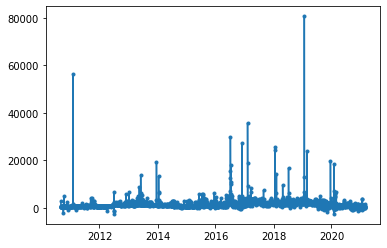

In [10]:
plt.plot(elec_daily, ".-")

In [11]:
tm_daily = data["Tmax"].resample("D").sum()
tm_daily

FullDate
2010-09-01    379.2
2010-09-02    369.6
2010-09-03    439.2
2010-09-04    328.8
2010-09-05    357.6
              ...  
2021-02-24    537.6
2021-02-25    518.4
2021-02-26    547.2
2021-02-27    564.0
2021-02-28    583.2
Freq: D, Name: Tmax, Length: 3834, dtype: float64

In [12]:
load_daily = data["SysLoad"].resample("D").sum()
load_daily

FullDate
2010-09-01    41565.38000
2010-09-02    38898.99000
2010-09-03    41665.76000
2010-09-04    35638.08500
2010-09-05    35611.41000
                 ...     
2021-02-24    -1525.49745
2021-02-25     4539.07855
2021-02-26     9517.02430
2021-02-27     4932.88015
2021-02-28     6675.05485
Freq: D, Name: SysLoad, Length: 3834, dtype: float64

In [13]:
adf = adfuller(load_daily)
print(f"ADF stat: {adf[0]}\np-value: {adf[1]}\nLag: {adf[2]}\nObservations: {adf[3]}\nCritical Values:")
for k, v in adf[4].items():
    print(f"    {k}: {v}")

ADF stat: -3.6901589888366457
p-value: 0.004253725504574117
Lag: 30
Observations: 3803
Critical Values:
    1%: -3.432070672988693
    5%: -2.8623002987378547
    10%: -2.567174716967499


In [14]:
gas_daily = data["GasPrice"].resample("D").sum()
gas_daily

FullDate
2010-09-01     88.5600
2010-09-02     88.5600
2010-09-03    106.8000
2010-09-04     81.3600
2010-09-05    106.8000
                ...   
2021-02-24    134.4000
2021-02-25    130.5048
2021-02-26    130.1808
2021-02-27    130.0800
2021-02-28    131.6352
Freq: D, Name: GasPrice, Length: 3834, dtype: float64

In [15]:
adf = adfuller(gas_daily)
print(f"ADF stat: {adf[0]}\np-value: {adf[1]}\nLag: {adf[2]}\nObservations: {adf[3]}\nCritical Values:")
for k, v in adf[4].items():
    print(f"    {k}: {v}")

ADF stat: -2.90276669716518
p-value: 0.04502721288462542
Lag: 27
Observations: 3806
Critical Values:
    1%: -3.4320693157877544
    5%: -2.8622996992165364
    10%: -2.5671743978048323


In [41]:
def mean_absolute_percentage_error(y_t, y_p):
   mape = np.abs(y_t - y_p) / np.abs(y_t)
   return mape.mean()

In [42]:
def show_res(y_t, y_p):
  mape = mean_absolute_percentage_error(y_t, y_p) 
  mae = mean_absolute_error(y_t, y_p)
  rmse = mean_squared_error(y_t, y_p, squared=False) 
  r2 = r2_score(y_t, y_p)
  return pd.DataFrame([mape, mae, rmse, r2], index=["MAPE", "MAE", "RMSE", "$R^2$"])


## Univariate Model on Electricity Price

In [50]:
#prepare dataset for Prophet model
uni_df = pd.DataFrame()
uni_df["ds"] = elec_daily.index
uni_df["y"] = elec_daily.values

#split data
train = uni_df.iloc[:2757]
test = uni_df.iloc[2757:]

#fit model
model = Prophet()
model.fit(train)

#make predictions
future = model.make_future_dataframe(periods=1077, freq="D")
forecast = model.predict(future)

#evaluate results
y_pred = forecast["yhat"][2757:]
y_actual = test['y']
show_res(y_actual, y_pred)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


,0
MAPE,5.494751
MAE,1748.519246
RMSE,3218.155777
$R^2$,-0.251829


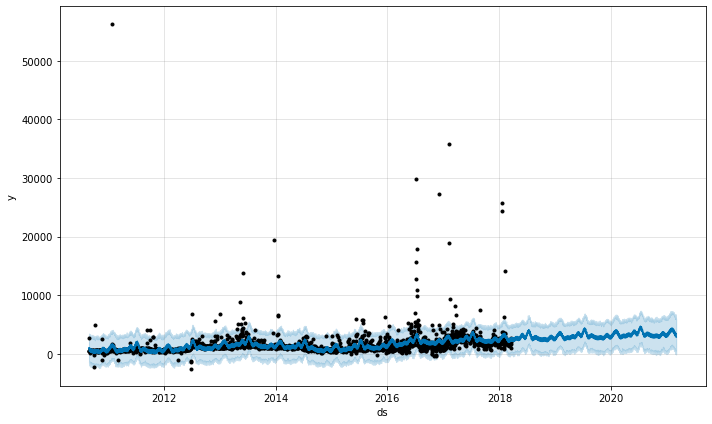

In [45]:
model.plot(forecast)
plt.show()

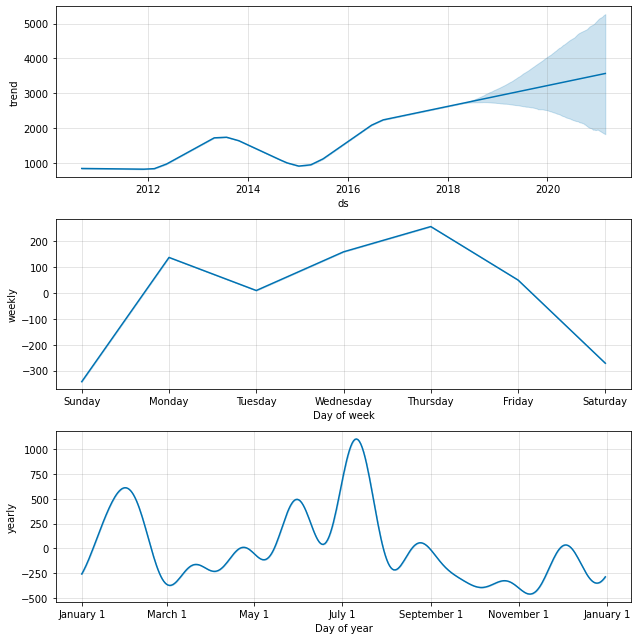

In [46]:
model.plot_components(forecast)
plt.show()

## Multivariate Model on Electricity Price

In [52]:
#prepare dataset for Prophet model
mul_df = pd.DataFrame()
mul_df["ds"] = elec_daily.index
mul_df["y"] = elec_daily.values
mul_df["add1"] = load_daily.values
mul_df["add2"] = tm_daily.values
mul_df["add3"] = gas_daily.values

#split data
train2 = mul_df.iloc[:2757]
test2 = mul_df.iloc[2757:]

#fit model after adding regressors
model2 = Prophet()
model2.add_regressor('add1')
model2.add_regressor('add2')
model2.add_regressor('add3')
model2.fit(train2)

#make predictions
future2 = model2.make_future_dataframe(periods=1077, freq="D")
future2["add1"] = mul_df.add1.values
future2["add2"] = mul_df.add2.values
future2["add3"] = mul_df.add3.values
forecast2 = model2.predict(future2)

#evaluate results
y_pred2 = forecast2["yhat"][2757:]
y_actual2 = test2['y']
show_res(y_actual2, y_pred2)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


,0
MAPE,2.337449
MAE,992.965573
RMSE,2709.649342
$R^2$,0.112523


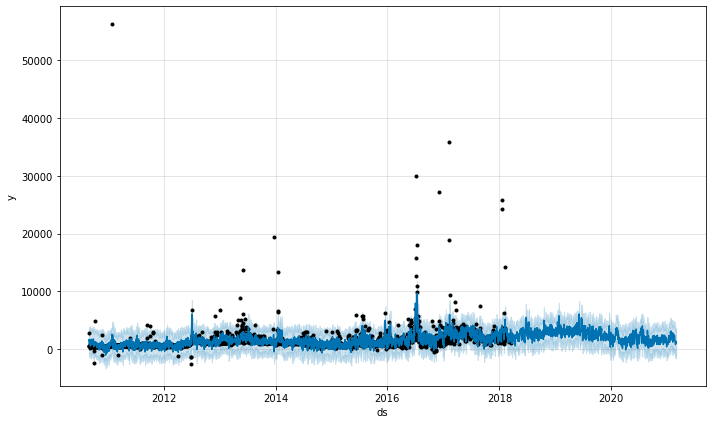

In [48]:
model2.plot(forecast2)
plt.show()

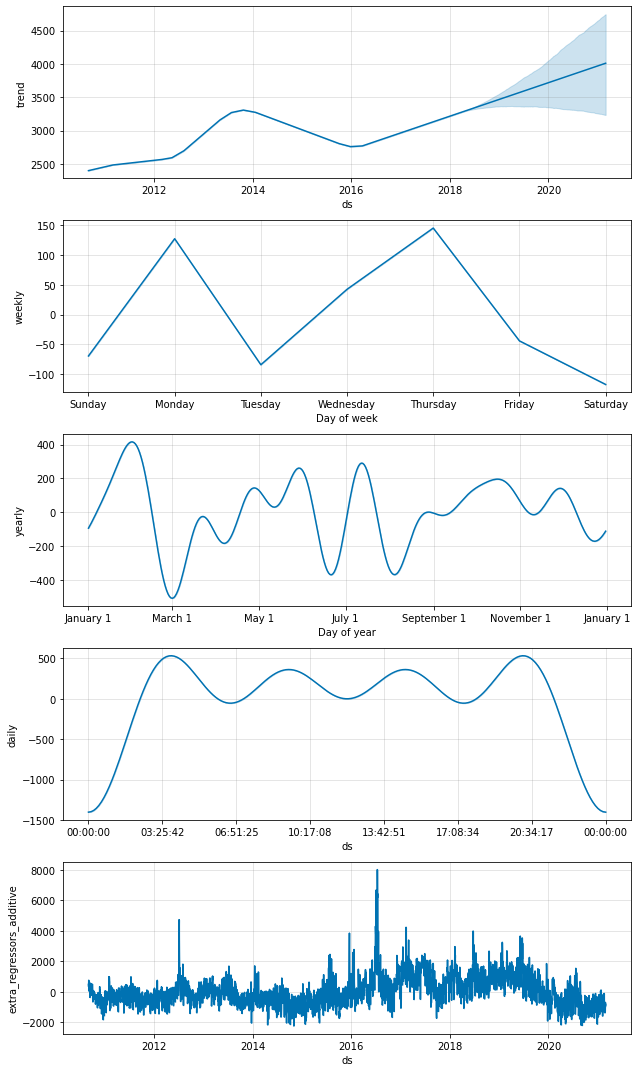

In [49]:
model2.plot_components(forecast2)
plt.show()

## Multivariate without Tmax

In [53]:
#prepare dataset for Prophet model
mul_df2 = pd.DataFrame()
mul_df2["ds"] = elec_daily.index
mul_df2["y"] = elec_daily.values
mul_df2["add1"] = load_daily.values
mul_df2["add2"] = gas_daily.values

#split data
train3 = mul_df2.iloc[:2757]
test3 = mul_df2.iloc[2757:]

#fit model
model3 = Prophet()
model3.add_regressor('add1')
model3.add_regressor('add2')
model3.fit(train3)

#make predictions
future3 = model3.make_future_dataframe(periods=1077, freq="D")
future3["add1"] = mul_df2.add1.values
future3["add2"] = mul_df2.add2.values
forecast3 = model3.predict(future3)

#evaluate results
y_pred3 = forecast3["yhat"][2757:]
y_actual3 = test3['y']
show_res(y_actual3, y_pred3)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


,0
MAPE,2.366632
MAE,1003.621465
RMSE,2712.934015
$R^2$,0.110370
